In [1]:
!pip install tensorflow scikit-learn


[notice] A new release of pip is available: 23.0.1 -> 25.0
[notice] To update, run: pip install --upgrade pip


In [2]:
import tensorflow as tf
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

In [3]:
iris = load_iris()
y = iris.target.reshape(-1,1)
X = iris.data

In [4]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, input_shape=(X_train.shape[1],), activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

/Users/sohan/.pyenv/versions/3.10.12/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.fit(X_train, y_train, epochs=80, batch_size=10, validation_split=0.1)

Epoch 1/80
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3559 - loss: 1.6227 - val_accuracy: 0.4167 - val_loss: 1.2107
Epoch 2/80
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3082 - loss: 1.6530 - val_accuracy: 0.4167 - val_loss: 1.1443
Epoch 3/80
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3148 - loss: 1.4582 - val_accuracy: 0.4167 - val_loss: 1.1143
Epoch 4/80
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1456 - loss: 1.3615 - val_accuracy: 0.2500 - val_loss: 1.1027
Epoch 5/80
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1468 - loss: 1.2526 - val_accuracy: 0.4167 - val_loss: 1.1031
Epoch 6/80
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2375 - loss: 1.1553 - val_accuracy: 0.3333 - val_loss: 1.0979
Epoch 7/80
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2093 - loss: 1.1680 - val_accuracy: 0.2500 - val_loss: 1.1038
Epoch 8/80
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1603 - loss: 1.1486 - val_accuracy: 0.3333 - val_loss:

In [7]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\nTest accuracy: {test_acc * 100:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 1.0000 - loss: 0.2292

Test accuracy: 100.00%


In [8]:
predictions = model.predict(X_test[:7]) 
print(f"Predictions :\n{predictions}")
class_indices = np.argmax(predictions, axis=1) 
print(f"Predicted classes (numerical): {class_indices}")
class_names = {0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'} 
predicted_classes = [class_names[i] for i in class_indices] 
print(f"Predicted classes: {predicted_classes}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predictions :
[[1.62457135e-02 6.72105908e-01 3.11648369e-01]
 [9.86910760e-01 1.29140513e-02 1.75215013e-04]
 [7.39844807e-04 1.07907303e-01 8.91352832e-01]
 [1.51523855e-02 6.27019286e-01 3.57828289e-01]
 [1.15457885e-02 7.31898785e-01 2.56555498e-01]
 [9.75424528e-01 2.41052769e-02 4.70194471e-04]
 [3.55231687e-02 8.22569668e-01 1.41907185e-01]]
Predicted classes (numerical): [1 0 2 1 1 0 1]
Predicted classes: ['Versicolor', 'Setosa', 'Virginica', 'Versicolor', 'Versicolor', 'Setosa', 'Versicolor']


## MLP Classifier

In [9]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [10]:
iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
mlp = MLPClassifier(hidden_layer_sizes=(10, 10), activation='relu', max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=42)

In [12]:
y_pred = mlp.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy:.4f}')

Test Accuracy: 0.9833


## HANDWRITTEN DIGITS

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

In [14]:
digits = datasets.load_digits()

n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.4, random_state=0)

In [15]:
classifier = svm.SVC(gamma=0.005)

classifier.fit(X_train, y_train)

predicted = classifier.predict(X_test)

In [16]:
accuracy = metrics.accuracy_score(y_test, predicted) 
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.97


In [17]:
print(f"Classification report for classifier {classifier}:\n{metrics.classification_report(y_test, predicted)}\n")

Classification report for classifier SVC(gamma=0.005):
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        60
           1       1.00      0.97      0.99        73
           2       1.00      0.96      0.98        71
           3       1.00      0.93      0.96        70
           4       1.00      1.00      1.00        63
           5       1.00      0.96      0.98        89
           6       1.00      0.93      0.97        76
           7       1.00      0.97      0.98        65
           8       0.80      1.00      0.89        78
           9       0.95      1.00      0.97        74

    accuracy                           0.97       719
   macro avg       0.98      0.97      0.97       719
weighted avg       0.97      0.97      0.97       719




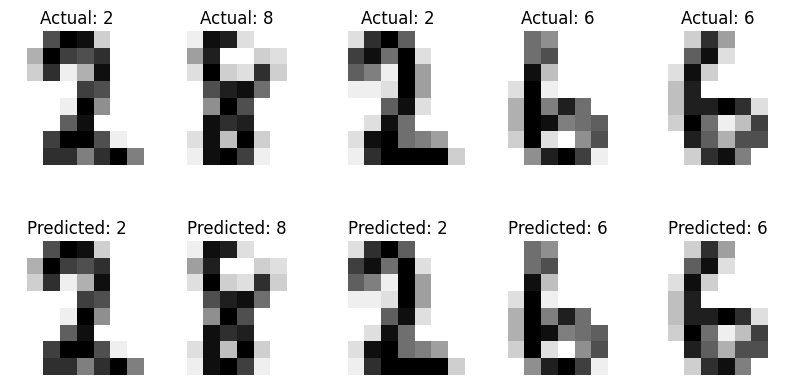

In [18]:
_, axes = plt.subplots(2, 5, figsize=(10, 5))
images_and_labels = list(zip(X_test, y_test))

for ax, (image, label) in zip(axes[0, :], images_and_labels[:5]):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f"Actual: {label}")

images_and_predictions = list(zip(X_test, predicted))

for ax, (image, prediction) in zip(axes[1, :], images_and_predictions[:5]):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f"Predicted: {prediction}")

plt.show()